In [1]:
import json
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pandas as pd


# NLTK Packages --------------------------------------------------------
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords
# NLTK Packages --------------------------------------------------------


/Users/vihangajayalath/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vihangajayalath/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
twitter_json_file = '/Users/vihangajayalath/Desktop/UniMelb/Semester 4/Cluster and Cloud Computing/Assignment2/TestData/smallTwitter.json'

def Load_Data(json_file):
    try:
        twitter_data_json = open(json_file, 'r')
        start_pos = 0
        tweet_texts = []

        file_size = twitter_data_json.seek(0, os.SEEK_END)

        while start_pos < file_size:
            twitter_data_json.seek(start_pos)
            tweet_data_line = twitter_data_json.readline()
            json_format = re.findall(r'^\{"id":.+,"key"\:.+,"value"\:.+"properties"\:.+"doc"\:.+"location"\:"melbourne"\}\}', tweet_data_line)

            start_pos = twitter_data_json.tell()

            if len(json_format) != 0:
                tweet_data_dict = {}
                load_tweet_data = json.loads(json_format[0])
                if 'en' in load_tweet_data['doc']['lang']:
                    cleaned_tweet_text = Clean_Tweets(load_tweet_data['value']['properties']['text'])
                    tweet_texts.append(cleaned_tweet_text)

        return tweet_texts

    except:
        return "Invalid File!"

def Clean_Tweets(data):
    tweet_text_noLinks = (re.sub(r'(https:\/\/t\.co\/[\/\.a-z0-9]+)|(http:[\/\.a-z0-9]+)', ' ', (data).lower()))
    tweet_text_noPunc_noLinks = (re.sub(r'[,\.!?\/\;\:\#\\\'\"]', ' ', tweet_text_noLinks))
    tweet_text_noPunc_noLinks = re.sub(r'(\\n)|(\\t)|[\(\)\\]', ' ', tweet_text_noPunc_noLinks)
    tweet_text_noPunc_noLinks_noUser = re.sub(r'\@\w+', ' ', tweet_text_noPunc_noLinks)

    return tweet_text_noPunc_noLinks_noUser


json_tweet_data = Load_Data(twitter_json_file)

In [3]:
def Plot_WordCloud(data):
    # Join the different processed titles together.
    long_string = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    # wordcloud.to_image()

In [29]:
twitter_kaggle_data_path = '/Users/vihangajayalath/Desktop/UniMelb/Semester 4/Cluster and Cloud Computing/Assignment2/TestData/Twitter_Data.csv'
twitter_kaggle_data = pd.read_csv(twitter_kaggle_data_path, encoding='utf-8')
twitter_kaggle_data['Cleaned_Tweet_Text'] = twitter_kaggle_data['clean_text'].apply(lambda x: Clean_Tweets(str(x)))
twitter_texts = twitter_kaggle_data['Cleaned_Tweet_Text'].values

In [30]:
twitter_kaggle_data

clean_text  category  \
0       when modi promised “minimum government maximum...      -1.0   
1       talk all the nonsense and continue all the dra...       0.0   
2       what did just say vote for modi  welcome bjp t...       1.0   
3       asking his supporters prefix chowkidar their n...       1.0   
4       answer who among these the most powerful world...       1.0   
...                                                   ...       ...   
162975  why these 456 crores paid neerav modi not reco...      -1.0   
162976  dear rss terrorist payal gawar what about modi...      -1.0   
162977  did you cover her interaction forum where she ...       0.0   
162978  there big project came into india modi dream p...       0.0   
162979  have you ever listen about like gurukul where ...       1.0   

                                       Cleaned_Tweet_Text  
0       when modi promised “minimum government maximum...  
1       talk all the nonsense and continue all the dra...  
2       what did just say vote for modi  welcome bjp t...  
3       asking his supporters prefix chowkidar their n...  
4       answer who among these the most powerful world...  
...                                                   ...  
162975  why these 456 crores paid neerav modi not reco...  
162976  dear rss terrorist payal gawar what about modi...  
162977  did you cover her interaction forum where she ...  
162978  there big project came into india modi dream p...  
162979  have you ever listen about like gurukul where ...  

[162980 rows x 3 columns]

In [31]:
twitter_texts

array(['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

In [32]:
len(twitter_texts)

162980

# Apple Customer Support

In [12]:
apple_support_tweets_path = '/Users/vihangajayalath/Desktop/UniMelb/Semester 4/Cluster and Cloud Computing/Assignment2/TestData/apple_support_tweets.csv'
apple_support_tweets = pd.read_csv(apple_support_tweets_path)
apple_support_tweets['Cleaned_Tweet_Text'] = apple_support_tweets['text'].apply(lambda x: Clean_Tweets(x))

apple_support_tweet_texts = apple_support_tweets['Cleaned_Tweet_Text']

In [43]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


# data_words = list(sent_to_words(json_tweet_data))
# data_words = list(sent_to_words(twitter_texts[:500000]))
data_words = list(sent_to_words(apple_support_tweet_texts[:500000]))


# remove stop words
data_words = remove_stopwords(data_words)

# print(data_words[:1][0][:30])
# print(data_words)

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1][0][:30])
# print(corpus)

In [15]:
# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"gt" + 0.009*"hi" + 0.008*"stock" + 0.007*"dm" + 0.007*"center" + '
  '0.006*"replied" + 0.006*"amp" + 0.006*"via" + 0.006*"ja" + 0.006*"control"'),
 (1,
  '0.020*"call" + 0.015*"account" + 0.011*"money" + 0.010*"get" + 0.009*"card" '
  '+ 0.009*"back" + 0.009*"got" + 0.008*"hi" + 0.008*"uber" + 0.008*"charged"'),
 (2,
  '0.018*"get" + 0.016*"delivery" + 0.016*"today" + 0.013*"day" + '
  '0.011*"still" + 0.011*"pm" + 0.010*"flight" + 0.010*"last" + '
  '0.009*"waiting" + 0.008*"th"'),
 (3,
  '0.040*"sent" + 0.030*"hi" + 0.021*"dm" + 0.014*"thank" + 0.012*"hello" + '
  '0.012*"please" + 0.011*"done" + 0.011*"us" + 0.009*"message" + '
  '0.008*"reply"'),
 (4,
  '0.037*"de" + 0.031*"que" + 0.020*"la" + 0.019*"el" + 0.018*"feedback" + '
  '0.017*"en" + 0.015*"team" + 0.013*"por" + 0.013*"sorry" + 0.011*"con"'),
 (5,
  '0.051*"service" + 0.044*"customer" + 0.015*"issue" + 0.013*"idea" + '
  '0.011*"care" + 0.009*"worst" + 0.008*"ur" + 0.007*"response" + '
  '0.006*"resolve" + 

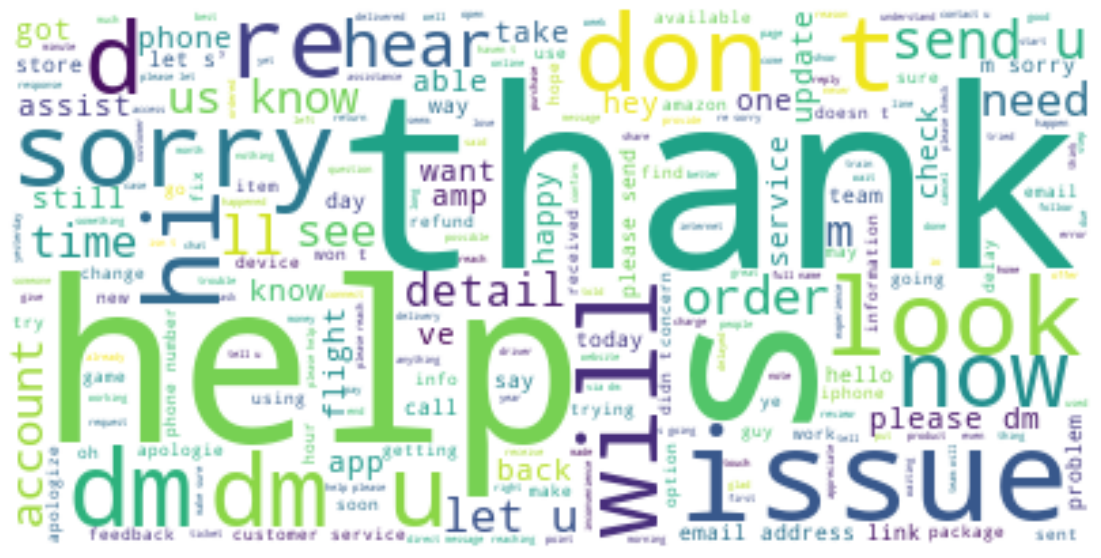

In [42]:
Plot_WordCloud(apple_support_tweet_texts[:500000])

# Kaggle Sentiment Analysis

In [34]:
data_words = list(sent_to_words(twitter_texts[:500000]))

# remove stop words
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.065*"modi" + 0.018*"nirav" + 0.010*"govt" + 0.009*"bjp" + 0.008*"crore" + '
  '0.007*"india" + 0.007*"mallya" + 0.006*"money" + 0.006*"court" + '
  '0.005*"lakh"'),
 (1,
  '0.061*"modi" + 0.023*"satellite" + 0.014*"india" + 0.011*"jai" + '
  '0.008*"pakistan" + 0.006*"hind" + 0.006*"modis" + 0.006*"missile" + '
  '0.006*"china" + 0.005*"indian"'),
 (2,
  '0.074*"modi" + 0.014*"india" + 0.014*"scientists" + 0.008*"people" + '
  '0.007*"election" + 0.007*"mission" + 0.007*"chowkidar" + 0.006*"shakti" + '
  '0.005*"nation" + 0.005*"indian"'),
 (3,
  '0.066*"modi" + 0.009*"congress" + 0.008*"rahul" + 0.007*"india" + '
  '0.007*"government" + 0.007*"today" + 0.007*"narendra" + 0.007*"gandhi" + '
  '0.006*"nation" + 0.006*"bjp"'),
 (4,
  '0.060*"modi" + 0.013*"dont" + 0.011*"india" + 0.010*"also" + '
  '0.009*"election" + 0.008*"know" + 0.007*"modis" + 0.006*"please" + '
  '0.005*"govt" + 0.005*"orbit"'),
 (5,
  '0.069*"modi" + 0.015*"india" + 0.011*"people" + 0.010*"like" + 0.009*

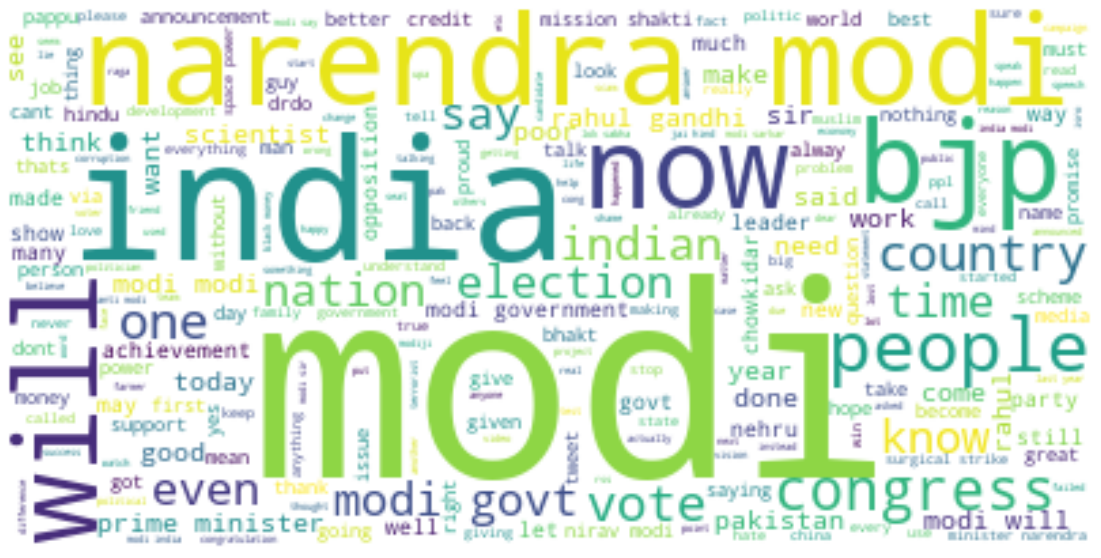

In [33]:
Plot_WordCloud(twitter_texts[:100000])

# SmallTwitter.json

In [16]:
data_words = list(sent_to_words(json_tweet_data))

# remove stop words
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.050*"melbourne" + 0.029*"beach" + 0.027*"st" + 0.022*"kilda" + '
  '0.020*"pls" + 0.014*"port" + 0.010*"day" + 0.010*"stkilda" + 0.007*"park" + '
  '0.006*"today"'),
 (1,
  '0.083*"st" + 0.079*"kilda" + 0.070*"beach" + 0.033*"melbourne" + '
  '0.012*"day" + 0.010*"stkilda" + 0.009*"vic" + 0.008*"one" + 0.007*"pier" + '
  '0.006*"australia"'),
 (2,
  '0.012*"melbourne" + 0.008*"beach" + 0.008*"australia" + 0.008*"park" + '
  '0.007*"st" + 0.007*"albert" + 0.007*"last" + 0.007*"kilda" + 0.006*"today" '
  '+ 0.005*"grand"'),
 (3,
  '0.038*"park" + 0.031*"albert" + 0.016*"lake" + 0.015*"beach" + '
  '0.014*"melbourne" + 0.012*"st" + 0.010*"kilda" + 0.009*"day" + '
  '0.006*"night" + 0.006*"amp"'),
 (4,
  '0.020*"melbourne" + 0.007*"park" + 0.006*"morning" + 0.006*"st" + '
  '0.006*"stkilda" + 0.006*"good" + 0.006*"night" + 0.006*"today" + '
  '0.006*"time" + 0.006*"get"'),
 (5,
  '0.044*"melbourne" + 0.028*"beach" + 0.015*"port" + 0.011*"park" + '
  '0.010*"st" + 0.010*"vic" + 0.

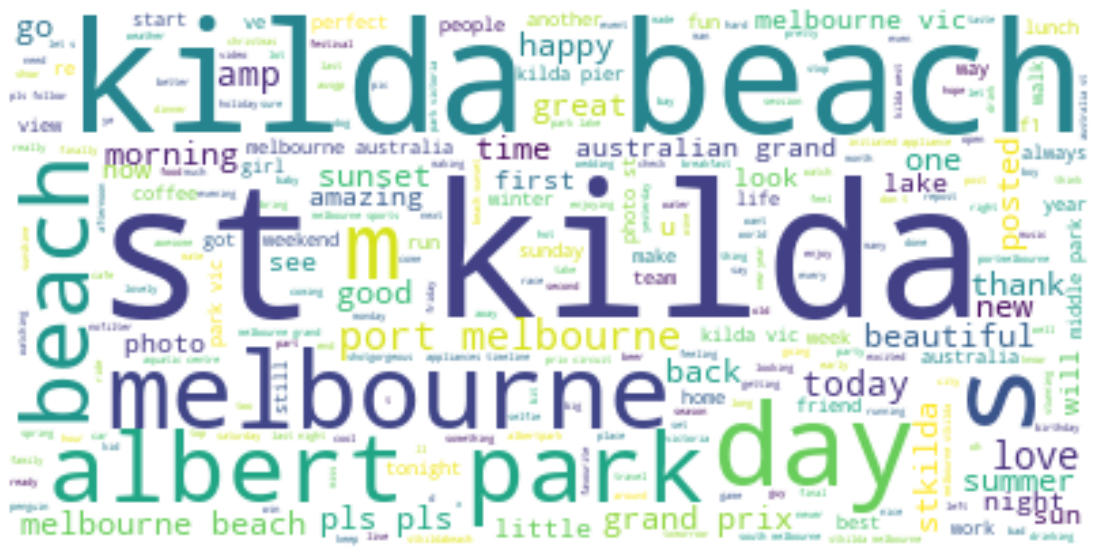

In [4]:
Plot_WordCloud(json_tweet_data)

# AUS 2019 Election

In [38]:
aus_election_tweets_path = '/Users/vihangajayalath/Desktop/UniMelb/Semester 4/Cluster and Cloud Computing/Assignment2/TestData/auspol2019.csv'
aus_election_tweets = pd.read_csv(aus_election_tweets_path)
aus_election_tweets['Cleaned_Tweet_Text'] = aus_election_tweets['full_text'].apply(lambda x: Clean_Tweets(x))

aus_election_tweet_texts = aus_election_tweets['Cleaned_Tweet_Text']

In [40]:
data_words = list(sent_to_words(aus_election_tweet_texts))

# remove stop words
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.050*"ausvotes" + 0.037*"auspol" + 0.017*"election" + 0.016*"labor" + '
  '0.014*"vote" + 0.012*"democracy" + 0.011*"sausage" + 0.010*"amp" + '
  '0.010*"australia" + 0.010*"australiavotes"'),
 (1,
  '0.037*"auspol" + 0.029*"ausvotes" + 0.023*"vote" + 0.014*"australia" + '
  '0.012*"amp" + 0.010*"voted" + 0.009*"australiavotes" + 0.008*"election" + '
  '0.008*"us" + 0.007*"people"'),
 (2,
  '0.055*"auspol" + 0.044*"ausvotes" + 0.020*"labor" + 0.015*"party" + '
  '0.013*"election" + 0.008*"right" + 0.007*"liberal" + 0.007*"australia" + '
  '0.007*"like" + 0.007*"would"'),
 (3,
  '0.042*"auspol" + 0.019*"people" + 0.015*"amp" + 0.015*"ausvotes" + '
  '0.009*"australia" + 0.008*"vote" + 0.008*"election" + 0.008*"one" + '
  '0.008*"want" + 0.006*"like"'),
 (4,
  '0.037*"auspol" + 0.031*"election" + 0.022*"ausvotes" + 0.014*"australia" + '
  '0.009*"day" + 0.008*"media" + 0.008*"polling" + 0.007*"australiavotes" + '
  '0.007*"australian" + 0.006*"labor"'),
 (5,
  '0.051*"auspol" + 

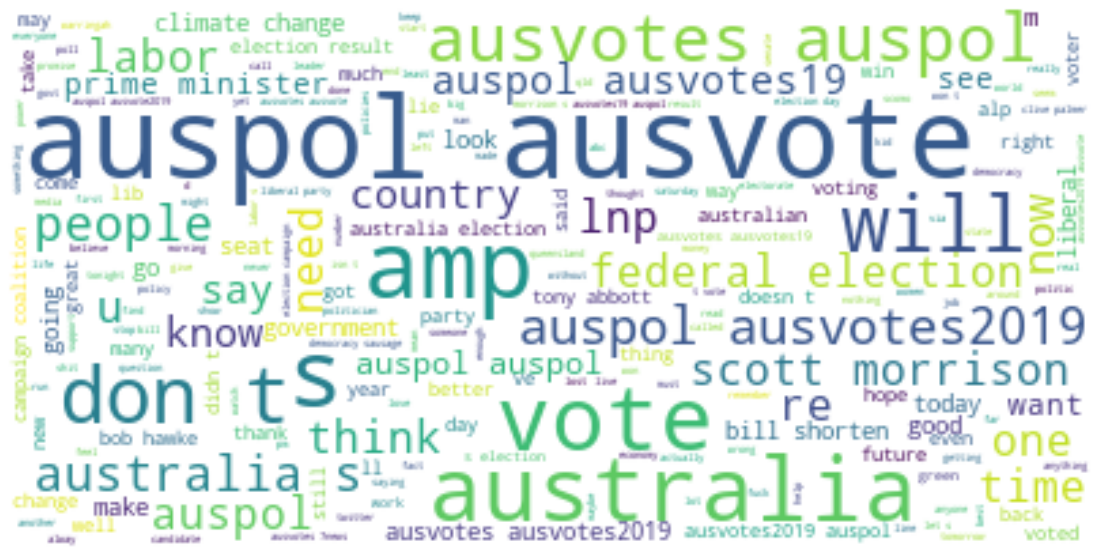

In [41]:
Plot_WordCloud(aus_election_tweet_texts)